In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
population = np.random.exponential(scale=10, size = 1_000_000)

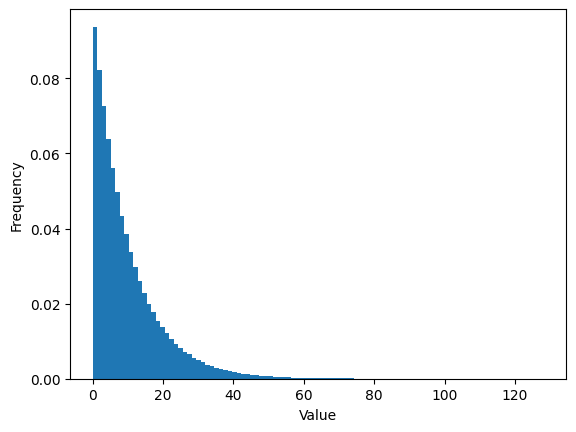

In [3]:
plt.hist(population, bins=100, density=True)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Simple Random Sampling (SRS)

In [4]:
sample = np.random.choice(population, size=1000, replace=False)
print(f"Mean of random sampling: {sample.mean()}")
print(f"Standard Deviation of the sample: {sample.std()}")

Mean of random sampling: 9.549680342009138
Standard Deviation of the sample: 9.741800896111075


This is the sample dataset which ML sees during model training. The dataset is one sample from the underlying population. The mean of this single sample is an estimate of the true population mean. The standard deviation is the spread of the original population.

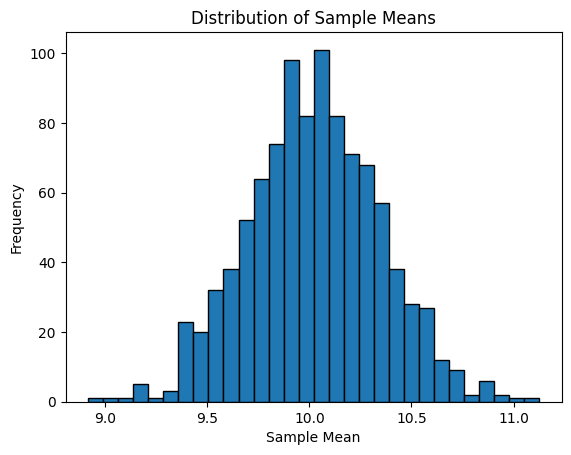

In [5]:
sample_means = []
for _ in range(1000):
    sample = np.random.choice(population, size=1000, replace=False)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

This verifies the Central Limit Theorem (CLT). We took the mean of samples from a skewed population repeatedly and the distribution of those means tends to be approximately normal. So regardless of the population distribution, the sampling distribution of the mean approaches normal distribution.  

In [6]:
print("Mean of sample means:", np.mean(sample_means))
print("Variance of sample means:", np.var(sample_means))

Mean of sample means: 10.023804243435945
Variance of sample means: 0.10436720703688616


Two things. 
1. Sample mean are useful because it gives the best estimate of population mean. Like in our case. We generated a population distribution of mean 10. The sample mean of that population was around 10 too. It is a reliable "representative number" from the population. In ML, if our training dataset is a sample, the mean feature values, or other statistics, are often what the model learns from. 
Therefore, A stable sample mean -> more stable models.

2. Averaging reduces variability. Individual data might jump around a lot. The mean smooths out the extremes. Smaller variance -> smaller standard error, meaning estimate of population mean is more reliable. 

If your sample size is small → high variance → unreliable conclusions.
If your sample size is large → low variance → confident conclusions.

This is directly related to why larger training datasets improve ML model reliability.

## Validating Central Limit Theorem

In [7]:
sample_sizes = [5, 20, 50, 200]
num_samples = 500

sample_means = {}

for n in sample_sizes:
    means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(num_samples)]
    sample_means[n] = np.array(means)


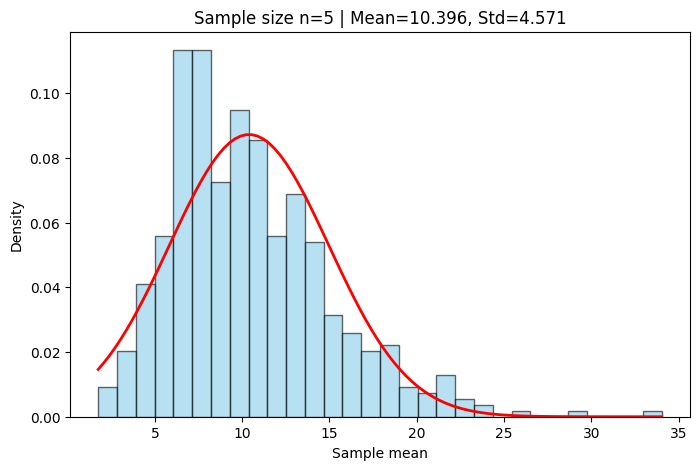

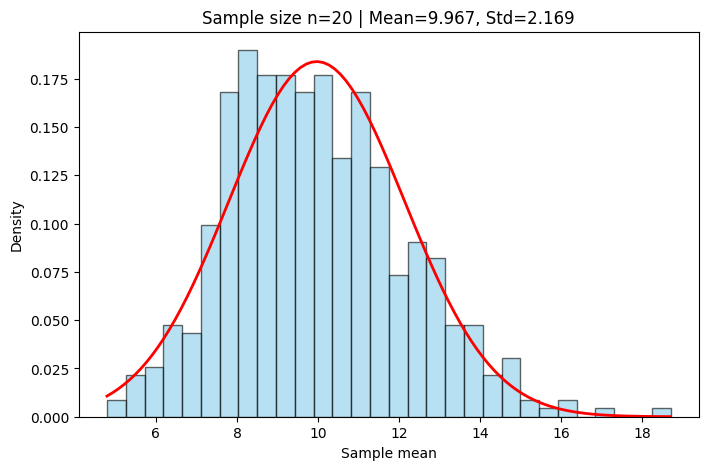

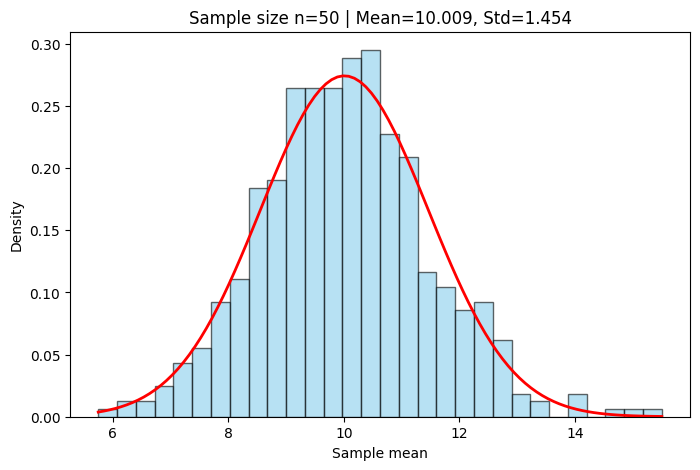

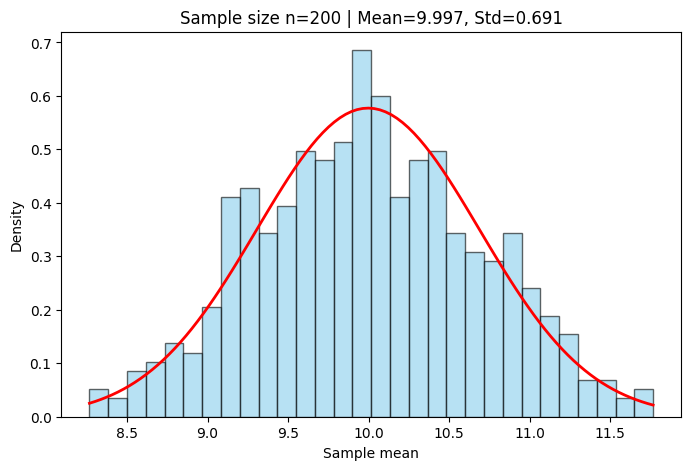

In [8]:
for n in sample_sizes:
    means = sample_means[n]
    mu = np.mean(means)
    sigma = np.std(means)
    
    plt.figure(figsize=(8,5))
    plt.hist(means, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    
    # Gaussian overlay
    x = np.linspace(min(means), max(means), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r', lw=2)
    
    plt.title(f"Sample size n={n} | Mean={mu:.3f}, Std={sigma:.3f}")
    plt.xlabel("Sample mean")
    plt.ylabel("Density")
    plt.show()


Means of sample has become more normally distributed as sample increases. This proves the Central Limit Theorem.

## Stratified vs Random Sampling

First create two population Strata with 70% from exponential distribution and 30% from normal distribution

In [9]:
N = 5000

pop_exp, pop_norm = 0.7, 0.3
N_exp, N_norm = int(N*pop_exp), int(N*pop_norm)

population_exp = np.random.exponential(scale=1.0, size=N_exp)
population_norm = np.random.normal(loc=5.0, scale=1.0, size=N_norm)

population = np.concatenate([population_exp, population_norm])

Here 70% is taken from expontial distribution of mean 1.0 and 30% is taken from normal distribution of mean 5.0. So the total population mean is somewhere between 1 and 5, weighed by the propotion of each population.

In [10]:
def simple_random_sample(population, n):
    return np.random.choice(population, size=n, replace=False)

def stratified_sample(pop_exp, pop_norm, n):
    n_exp = int(n * 0.7)
    n_norm = n - n_exp
    sample_exp = np.random.choice(pop_exp, size=n_exp, replace=False)
    sample_norm = np.random.choice(pop_norm, size=n_norm, replace=False)
    return np.concatenate([sample_exp, sample_norm]) 

In [11]:
sample_size = 100
trials = 500

means_random = []
means_strat = []

for _ in range(trials):
    srs = simple_random_sample(population, sample_size)
    strat = stratified_sample(population_exp, population_norm, sample_size)
    
    means_random.append(np.mean(srs))
    means_strat.append(np.mean(strat))

means_random = np.array(means_random)
means_strat = np.array(means_strat)


Random Sampling: Mean=2.21, Std=0.21, Var=0.01
Stratified Sampling: Mean=2.21, Std=0.10, Var=0.01


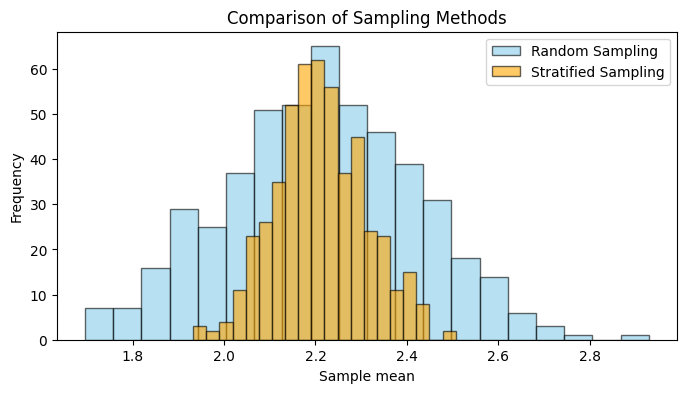

In [12]:
print(f"Random Sampling: Mean={means_random.mean():.2f}, Std={means_random.std():.2f}, Var={means_strat.var():.2f}")
print(f"Stratified Sampling: Mean={means_strat.mean():.2f}, Std={means_strat.std():.2f}, Var={means_strat.var():.2f}")

plt.figure(figsize=(8,4))
plt.hist(means_random, bins=20, alpha=0.6, label="Random Sampling", color='skyblue', edgecolor='black')
plt.hist(means_strat, bins=20, alpha=0.6, label="Stratified Sampling", color='orange', edgecolor='black')
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.title("Comparison of Sampling Methods")
plt.legend()
plt.show()


Random Sampling picks random n points from the combined population. Because the minority stratum (normal) is small, this add variability to the sample mean as some samples are pulled up by too many normal values and some are low if normal stratum is underrepresented. 

In Stratified Sampling, each sample is proportionaly taken from each stratum. Every sample has exactly the same mixture as the population. This removes the extra variability caused by random over or under representation.

By CLT, the mean of a sample tends to be normally distributed even if the underlying data is not normal, especially as sample size grows.
How much normal is determied by the variability of the data in the sample. 

## Systematic Sampling

In [13]:
# Structured population
N = 100
population = np.concatenate([np.linspace(1, 2, N//2), np.linspace(10, 11, N//2)])
k = 10  # step size for systematic sampling

In [14]:
def systematic_sample(pop, k):
    return pop[::k]

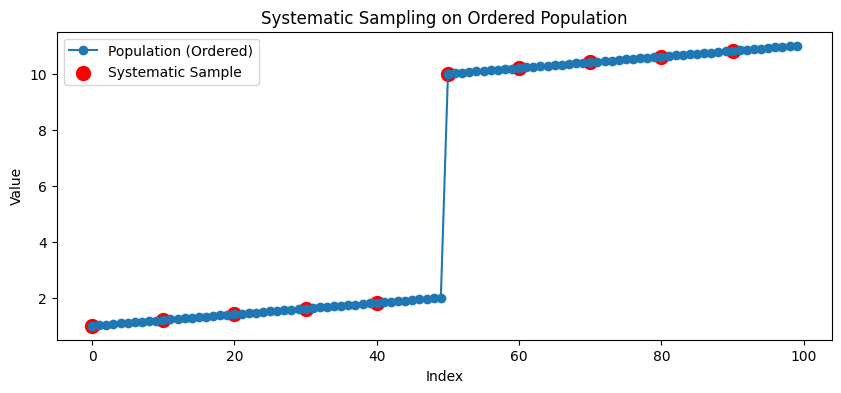

In [15]:
sample_ordered = systematic_sample(population, k)

plt.figure(figsize=(10,4))
plt.plot(population, label="Population (Ordered)", marker='o')
plt.scatter(np.arange(0, N, k), sample_ordered, color='red', s=100, label="Systematic Sample")
plt.title("Systematic Sampling on Ordered Population")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Observation (Ordered Population):
- Sample picks every k-th element, so it may miss blocks or over-represent others.
- Bias is introduced because the population has structure aligned with the sampling step.

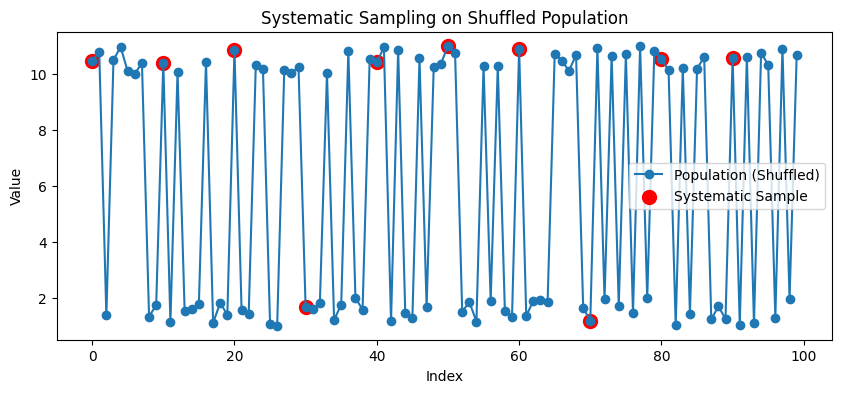

In [16]:
np.random.shuffle(population)
sample_shuffled = systematic_sample(population, k)

plt.figure(figsize=(10,4))
plt.plot(population, label="Population (Shuffled)", marker='o')
plt.scatter(np.arange(0, N, k), sample_shuffled, color='red', s=100, label="Systematic Sample")
plt.title("Systematic Sampling on Shuffled Population")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Observation (Shuffled Population):
- After shuffling, systematic sampling picks values randomly across the population.
- Sample is representative and unbiased because ordering no longer aligns with step size.

## Cluster Sampling

In [17]:
# Parameters
num_clusters = 100
cluster_size = 10
trials = 500

# Each cluster has a slightly different mean
cluster_means = np.random.normal(loc=0, scale=2, size=num_clusters)  # cluster-to-cluster variation
population = np.array([np.random.normal(loc=mu, scale=1, size=cluster_size) for mu in cluster_means])
population.shape = (num_clusters, cluster_size)

In [18]:
def sample_one_from_each_cluster(pop): # stratified-like
    return np.array([np.random.choice(cluster) for cluster in pop])

def sample_one_cluster(pop): # cluster sampling
    cluster_idx = np.random.randint(len(pop))
    return pop[cluster_idx]

In [19]:
means_individuals = []
means_clusters = []

for _ in range(trials):
    means_individuals.append(np.mean(sample_one_from_each_cluster(population)))
    means_clusters.append(np.mean(sample_one_cluster(population)))

means_individuals = np.array(means_individuals)
means_clusters = np.array(means_clusters)


In [20]:
print(f"Sampling 1 individual per cluster: Mean={means_individuals.mean():.2f}, Std={means_individuals.std():.2f}")
print(f"Sampling 1 entire cluster:       Mean={means_clusters.mean():.2f}, Std={means_clusters.std():.2f}")


Sampling 1 individual per cluster: Mean=-0.27, Std=0.09
Sampling 1 entire cluster:       Mean=-0.28, Std=2.14


Cluster sampling inflates variance because sampling a few clusters may not represent the population, whereas sampling one individual per cluster captures all clusters and lowers variance.

In ML, this is like training on few groups of data versus sampling across all groups—insufficient group coverage can lead to high model variance and poor generalization.

## Convenience Sampling Bias

In [21]:
# Population: mixture of two Gaussians
# Bimodal population. one peak around 0, and another around 5
N = 1000
pop1 = np.random.normal(loc=0, scale=1, size=N//2)
pop2 = np.random.normal(loc=5, scale=1, size=N//2)
population = np.concatenate([pop1, pop2])

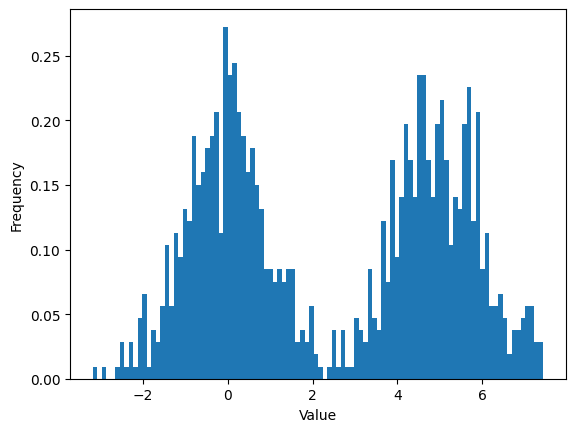

In [22]:
plt.hist(population, bins=100, density=True)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [23]:
# Convenience sample: first 200 values
convenience_sample = population[:200]

# Random sample: 200 values randomly selected
random_sample = np.random.choice(population, size=200, replace=False)


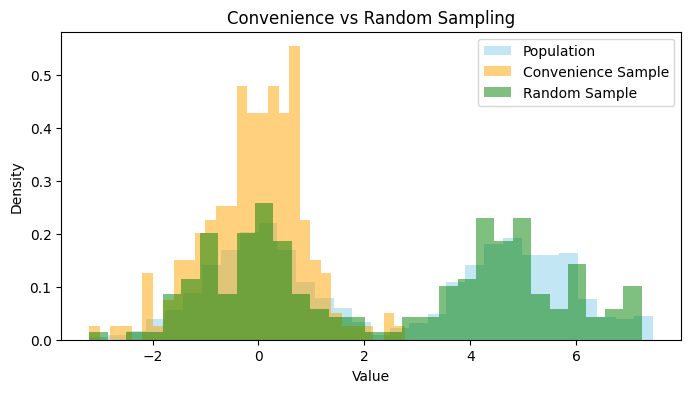

In [24]:
plt.figure(figsize=(8,4))
plt.hist(population, bins=30, alpha=0.5, label="Population", color='skyblue', density=True)
plt.hist(convenience_sample, bins=30, alpha=0.5, label="Convenience Sample", color='orange', density=True)
plt.hist(random_sample, bins=30, alpha=0.5, label="Random Sample", color='green', density=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Convenience vs Random Sampling")
plt.legend()
plt.show()


In [25]:
print(f"Population: Mean={population.mean():.2f}, Std={population.std():.2f}")
print(f"Convenience Sample: Mean={convenience_sample.mean():.2f}, Std={convenience_sample.std():.2f}")
print(f"Random Sample: Mean={random_sample.mean():.2f}, Std={random_sample.std():.2f}")


Population: Mean=2.46, Std=2.72
Convenience Sample: Mean=-0.06, Std=0.95
Random Sample: Mean=2.40, Std=2.75


Convenience Sample Fails to capture both modes and the mean and variance are biased, not representative of the population.

Random sample captures both modes proportionally and the mean and the variance are close to the true population. 

## Sampling Bias Effect on ML Models

In [26]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Create balanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, 
                           n_redundant=0, n_clusters_per_class=1, weights=[0.5,0.5], random_state=42)

In [27]:
# Keep all class 0, downsample class 1 to 10%
class0_idx = np.where(y==0)[0]
class1_idx = np.where(y==1)[0]

biased_class1_idx = np.random.choice(class1_idx, size=int(0.1*len(class1_idx)), replace=False)
biased_idx = np.concatenate([class0_idx, biased_class1_idx])

X_biased, y_biased = X[biased_idx], y[biased_idx]

print(f"Biased sample distribution: Class 0={np.sum(y_biased==0)}, Class 1={np.sum(y_biased==1)}")


Biased sample distribution: Class 0=499, Class 1=50


In [28]:
model = LogisticRegression()
model.fit(X_biased, y_biased)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [29]:
y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred, digits=3)

print(f"Accuracy on balanced test set: {acc:.3f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy on balanced test set: 0.798
Confusion Matrix:
 [[490   9]
 [193 308]]
Classification Report:
               precision    recall  f1-score   support

           0      0.717     0.982     0.829       499
           1      0.972     0.615     0.753       501

    accuracy                          0.798      1000
   macro avg      0.845     0.798     0.791      1000
weighted avg      0.845     0.798     0.791      1000



Here accuracy is close to 80%. You might think that is resonable. But it is being skewed by the domination of the majority class. There are many false negatives for the majority class. Recall is very low, showing the model is failing to detect the underrepresented class. 

This demonstrates a direct impact of statistical sampling bias on ML performance.

## Bootstrap Sampling

In Bootstrap Sampling, you start with one finite sample and pretend it is the population. By repeatedly sampling with replacement from this sample, you generate many alternative datasets that could have plausibly been observed.

Each bootstrap sample:
- has the same size as the original sample
- contains repeated points and missing points
- represents one possible realization of the data-generating process

Computing the statistic (mean) on each resample gives an empirical approximation of the sampling distribution of that statistic.

In [30]:
population = np.random.exponential(scale=1.0, size=5000)

# One observed sample
sample_size = 200
sample = np.random.choice(population, size=sample_size, replace=False)

sample_mean = np.mean(sample)
sample_mean

np.float64(1.1681959016010373)

In [31]:
B = 1000  # number of bootstrap samples
bootstrap_means = []

for _ in range(B):
    bootstrap_sample = np.random.choice(sample, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

bootstrap_means = np.array(bootstrap_means)


In [32]:
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"95% Bootstrap CI: [{ci_lower:.3f}, {ci_upper:.3f}]")


95% Bootstrap CI: [1.022, 1.334]


If you repeatedly collected new sample of the same size from the population, about 95% of the resulting sample means would fall between 0.802 to 1.053 

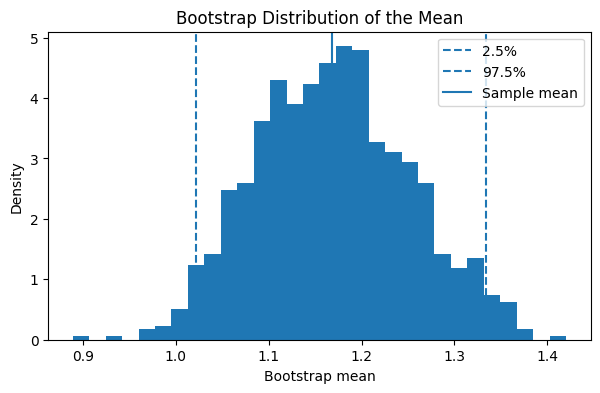

In [33]:
plt.figure(figsize=(7,4))
plt.hist(bootstrap_means, bins=30, density=True)
plt.axvline(ci_lower, linestyle='--', label='2.5%')
plt.axvline(ci_upper, linestyle='--', label='97.5%')
plt.axvline(sample_mean, linestyle='-', label='Sample mean')
plt.xlabel("Bootstrap mean")
plt.ylabel("Density")
plt.title("Bootstrap Distribution of the Mean")
plt.legend()
plt.show()


Normal Distribution againnnnn.

Central Limit Theorem hard at work here. 

Wouldn't be normal if it had very small size, heavy tailed distributions and the estimators that are not smooth (e.g. max, min)

Sample mean is the best point estimate of the population mean.
Each bootstrap mean is a possible value the sample mean could have been.

Each bootstrap sample simulates alternate worlds, as in if you take a slightly different sample, how much would your mean change?

The sample mean stays fixed. The bootstrap means fluctuate around it. The spread of those fluctuations = uncertainty.



In Machine Learning, Bootstrapping is useful for estimating how sensitive the model is to the small changes in the training data.

What does it reveal in Machine Learning?
- Model variance
    - Wide bootstrap distibution - unstable model
    - Narrow distribution - stable model


Why bagging works in ML?

Each bootstrap dataset gives a different model.
Averaging reduces variance.
This is what Random Forests do.


If you bootstrap:
- training data
- retrain logistic regression 1,000 times
- record accuracy

Then:
- mean accuracy = expected performance
- spread = model uncertainty
- skew = instability or bias

Bootstrap estimates how much your conclusions would change if the data collection were repeated—and in ML, that’s exactly what model variance measures.

Bootstrapping helps reducing variance. cancels noise and averages their errors.

## Train-Test Split as Sampling

In [34]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    weights=[0.7, 0.3],   # class imbalance
    random_state=42
)

In [35]:
trials = 100
acc_random = []
acc_strat  = []
acc_conv   = []

for i in range(trials):
    # Random split
    X_tr_r, X_te_r, y_tr_r, y_te_r = train_test_split(X, y, test_size=0.3)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_tr_r, y_tr_r)
    acc_random.append(accuracy_score(y_te_r, model.predict(X_te_r)))

    # Stratified split
    X_tr_s, X_te_s, y_tr_s, y_te_s = train_test_split(X, y, test_size=0.3, stratify=y)
    model.fit(X_tr_s, y_tr_s)
    acc_strat.append(accuracy_score(y_te_s, model.predict(X_te_s)))

    # Convenience split (same order, deterministic)
    split = int(0.3*len(X))
    X_tr_c, X_te_c = X[:split], X[split:]
    y_tr_c, y_te_c = y[:split], y[split:]
    model.fit(X_tr_c, y_tr_c)
    acc_conv.append(accuracy_score(y_te_c, model.predict(X_te_c)))

C:\Users\hp\AppData\Local\Temp\ipykernel_12268\3330392950.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([acc_random, acc_strat, acc_conv], labels=["Random", "Stratified", "Convenience"])


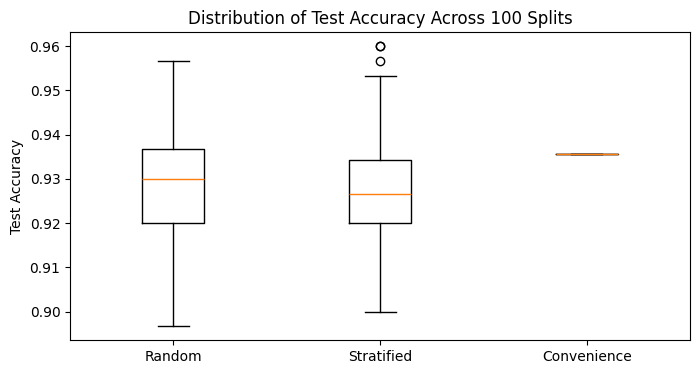

In [36]:
plt.figure(figsize=(8,4))
plt.boxplot([acc_random, acc_strat, acc_conv], labels=["Random", "Stratified", "Convenience"])
plt.ylabel("Test Accuracy")
plt.title("Distribution of Test Accuracy Across 100 Splits")
plt.show()

On random sample, the test set may slightly over/under represent a class (sampling variance). Accuracy is noisey but rougly correct.

On stratified sample, test set preserves the true class propotions. Fewer easy or hard skews. Accuracy is more stable and closer to the expected performance.

On convenience split, the split is based on order, If earlier samples are cleaner or easier, test accuracy inflates. If later samples are harder, accuracy deflates. Accuracy look stable but is misleading. It doesn't reflect true variability or representativeness of the population.
Accuracy may be biased depending on how the data is ordered.